In [1]:
'''Example script showing how to use stateful RNNs
to model long sequences efficiently.
'''
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 25
# number of elements ahead that are used to make the prediction
lahead = 1

In [3]:
def gen_cosine_amp(amp=100, period=1000, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing

    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(2 * np.pi * idx / period)
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos

In [4]:
print('Generating Data')
cos = gen_cosine_amp()
print('Input shape:', cos.shape)

Generating Data
Input shape: (50000, 1, 1)


In [5]:
expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)

Output shape
(50000, 1)


In [6]:
print('Creating Model')
model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

Creating Model


In [9]:
model.layers[0].output_shape

(25, 1, 50)

+ In each batch, we need to initialize the cell value. If we use the option stateful, then the last value of the cell in last batch will be used for initial value for the cell in current batch. The dimension for cell will be `batch_size x output_dimension`.

In [8]:
print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=0,
              nb_epoch=1,
              shuffle=False)
    model.reset_states()

Training
Epoch 0 / 25
Epoch 1 / 25
Epoch 2 / 25
Epoch 3 / 25
Epoch 4 / 25
Epoch 5 / 25
Epoch 6 / 25
Epoch 7 / 25
Epoch 8 / 25
Epoch 9 / 25
Epoch 10 / 25
Epoch 11 / 25
Epoch 12 / 25
Epoch 13 / 25
Epoch 14 / 25
Epoch 15 / 25
Epoch 16 / 25
Epoch 17 / 25
Epoch 18 / 25
Epoch 19 / 25
Epoch 20 / 25
Epoch 21 / 25
Epoch 22 / 25
Epoch 23 / 25
Epoch 24 / 25


Predicting
Plotting Results


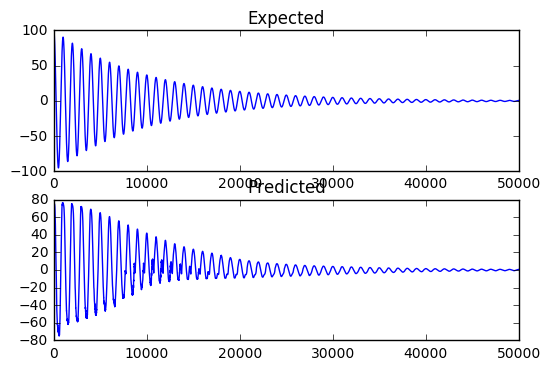

In [10]:
print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()